# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** AHMAD AIDIL FAJRI
- **Email:** ahmadaidilfajri0@gmail.com
- **ID Dicoding:** ahmad_aidil_fajri_12

## Menentukan Pertanyaan Bisnis

1.Bagaimana pengaruh cuaca (misalnya suhu, kelembaban, dan kecepatan angin) terhadap jumlah total sepeda yang disewa?

2.Apakah ada perbedaan signifikan dalam jumlah sepeda yang disewa antara hari kerja dan akhir pekan atau hari libur?

3.Pengguna Terdaftar vs Kasual: Bandingkan perilaku sewa sepeda antara pengguna terdaftar dan kasual. Apakah ada perbedaan pola sewa sepeda antara kedua grup ini?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [2]:
# Baca dataset
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv('hour.csv')


In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_segment,cluster
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Pagi,2
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Pagi,2
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Pagi,2
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Pagi,2
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Pagi,2


### Assessing Data

#### day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season        17379 non-null  int64  
 3   yr            17379 non-null  int64  
 4   mnth          17379 non-null  int64  
 5   hr            17379 non-null  int64  
 6   holiday       17379 non-null  int64  
 7   weekday       17379 non-null  int64  
 8   workingday    17379 non-null  int64  
 9   weathersit    17379 non-null  int64  
 10  temp          17379 non-null  float64
 11  atemp         17379 non-null  float64
 12  hum           17379 non-null  float64
 13  windspeed     17379 non-null  float64
 14  casual        17379 non-null  int64  
 15  registered    17379 non-null  int64  
 16  cnt           17379 non-null  int64  
 17  time_segment  17379 non-null  object 
 18  cluster       17379 non-nu

In [9]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_segment,cluster
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Pagi,2
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Pagi,2
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Pagi,2
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Pagi,2
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Pagi,2


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cluster
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,1.087002
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.802318
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,1.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2.000000


### Cleaning Data

#### Cek Tipe data

In [11]:
print("Tipe data di day_df:")
print(day_df.dtypes, "\n")

print("Tipe data di hour_df:")
print(hour_df.dtypes, "\n")

Tipe data di day_df:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object 

Tipe data di hour_df:
instant           int64
dteday           object
season            int64
yr                int64
mnth              int64
hr                int64
holiday           int64
weekday           int64
workingday        int64
weathersit        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
casual            int64
registered        int64
cnt               int64
time_segment     object
cluster           int64
dtype: object 



#### Cek Outlier

In [12]:
# Pastikan hanya kolom numerik yang digunakan
day_numeric = day_df.select_dtypes(include=['number'])

# Hitung Q1, Q3, dan IQR hanya untuk kolom numerik
Q1 = day_numeric.quantile(0.25)
Q3 = day_numeric.quantile(0.75)
IQR = Q3 - Q1

# Cek Outlier
outliers = ((day_numeric < (Q1 - 1.5 * IQR)) | (day_numeric > (Q3 + 1.5 * IQR))).sum()
print("Jumlah outlier di setiap kolom:")
print(outliers)


Jumlah outlier di setiap kolom:
instant        0
season         0
yr             0
mnth           0
holiday       21
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64


In [13]:
# Menghapus outlier di semua kolom numerik
day_clean = day_numeric[~((day_numeric < (Q1 - 1.5 * IQR)) | (day_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Jumlah data sebelum membersihkan outlier: {day_numeric.shape[0]}")
print(f"Jumlah data setelah membersihkan outlier: {day_clean.shape[0]}")

Jumlah data sebelum membersihkan outlier: 731
Jumlah data setelah membersihkan outlier: 655


In [14]:
Q1_clean = day_clean.quantile(0.25)
Q3_clean = day_clean.quantile(0.75)
IQR_clean = Q3_clean - Q1_clean

outlier_counts_clean = ((day_clean < (Q1_clean - 1.5 * IQR_clean)) | (day_clean > (Q3_clean + 1.5 * IQR_clean))).sum()
print("Jumlah outlier setelah pembersihan:\n", outlier_counts_clean)


Jumlah outlier setelah pembersihan:
 instant        0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      2
casual        16
registered     0
cnt            0
dtype: int64


In [15]:
from scipy import stats

z_scores = stats.zscore(day_numeric)
day_clean_z = day_numeric[(abs(z_scores) < 3).all(axis=1)]

print(f"Jumlah data setelah membersihkan outlier dengan Z-score: {day_clean_z.shape[0]}")

Jumlah data setelah membersihkan outlier dengan Z-score: 700


#### Cek Missing Value

In [16]:
# Cek missing values
print("Missing values di day_df:")
print(day_df.isna().sum(), "\n")

print("Missing values di hour_df:")
print(hour_df.isna().sum(), "\n")

Missing values di day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

Missing values di hour_df:
instant         0
dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
time_segment    0
cluster         0
dtype: int64 



#### Cek data yang terduplikat

In [17]:
# Cek duplikasi data
print(f"Jumlah duplikasi di day_df: {day_df.duplicated().sum()}")
print(f"Jumlah duplikasi di hour_df: {hour_df.duplicated().sum()}")

Jumlah duplikasi di day_df: 0
Jumlah duplikasi di hour_df: 0


#### Hapus missing values dan duplikasi jika ditemukan

In [18]:
day_df.dropna(inplace=True)
hour_df.dropna(inplace=True)
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

In [19]:
# Cek kembali setelah pembersihan
print("Setelah pembersihan:")
print(day_df.isna().sum(), "\n")
print(hour_df.isna().sum(), "\n")
print(f"Jumlah duplikasi setelah cleaning di day_df: {day_df.duplicated().sum()}")
print(f"Jumlah duplikasi setelah cleaning di hour_df: {hour_df.duplicated().sum()}")

Setelah pembersihan:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

instant         0
dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
time_segment    0
cluster         0
dtype: int64 

Jumlah duplikasi setelah cleaning di day_df: 0
Jumlah duplikasi setelah cleaning di hour_df: 0


#### **Data sudah Bersih**

## Exploratory Data Analysis (EDA)

### Explore day_df

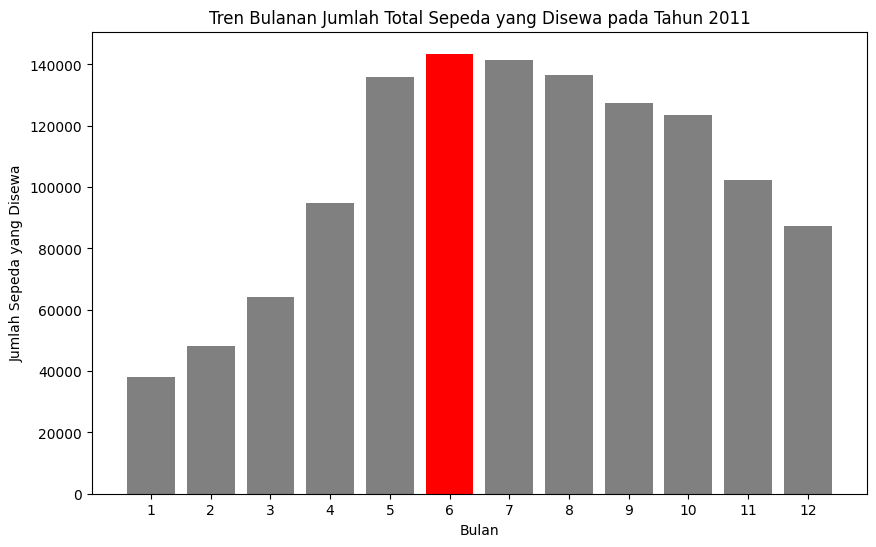

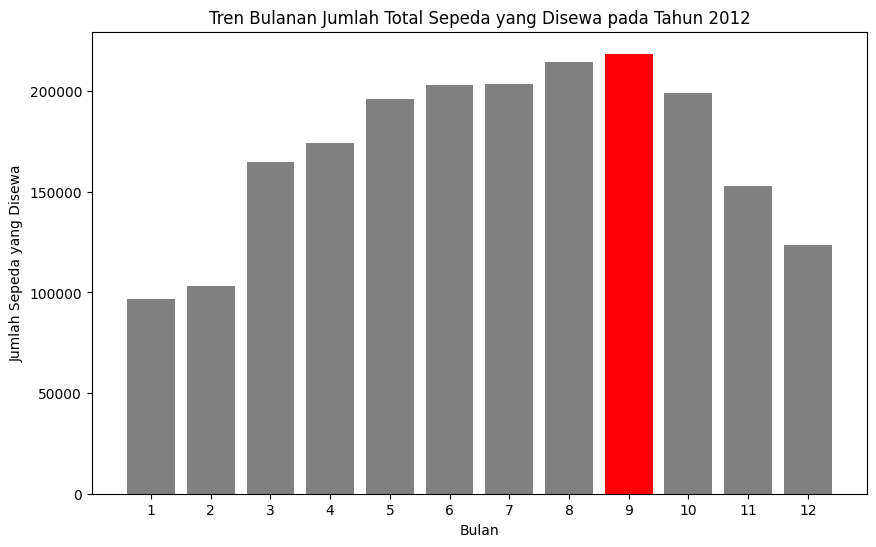

In [20]:
# Tren Bulanan untuk Masing-Masing Tahun
# Pastikan kolom 'dteday' sudah dalam format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Tren Bulanan untuk Masing-Masing Tahun
day_df['month'] = day_df['dteday'].dt.month
day_df['year'] = day_df['dteday'].dt.year

years = day_df['year'].unique()

for year in years:
    plt.figure(figsize=(10,6))
    monthly_counts = day_df[day_df['year'] == year].groupby('month')['cnt'].sum()
    colors = ['red' if x == monthly_counts.max() else 'grey' for x in monthly_counts]
    plt.bar(monthly_counts.index, monthly_counts, color=colors)
    plt.title(f'Tren Bulanan Jumlah Total Sepeda yang Disewa pada Tahun {year}')
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Sepeda yang Disewa')
    plt.xticks(range(1, 13))
    plt.show()


In [21]:
# Mencari Bulan dengan Jumlah Total Sepeda yang Disewa Tertinggi dan Terendah untuk Setiap Tahun

day_df['year'] = day_df['dteday'].dt.year

for year in day_df['year'].unique():
    yearly_data = day_df[day_df['year'] == year]
    monthly_counts = yearly_data.groupby('month')['cnt'].sum()

    max_month = monthly_counts.idxmax()
    min_month = monthly_counts.idxmin()

    print(f"Pada tahun {year}:")
    print(f"Bulan dengan jumlah total sepeda yang disewa tertinggi adalah bulan {max_month} dengan total sepeda disewa sebanyak {monthly_counts[max_month]}.")
    print(f"Bulan dengan jumlah total sepeda yang disewa terendah adalah bulan {min_month} dengan total sepeda disewa sebanyak {monthly_counts[min_month]}.\n")


Pada tahun 2011:
Bulan dengan jumlah total sepeda yang disewa tertinggi adalah bulan 6 dengan total sepeda disewa sebanyak 143512.
Bulan dengan jumlah total sepeda yang disewa terendah adalah bulan 1 dengan total sepeda disewa sebanyak 38189.

Pada tahun 2012:
Bulan dengan jumlah total sepeda yang disewa tertinggi adalah bulan 9 dengan total sepeda disewa sebanyak 218573.
Bulan dengan jumlah total sepeda yang disewa terendah adalah bulan 1 dengan total sepeda disewa sebanyak 96744.



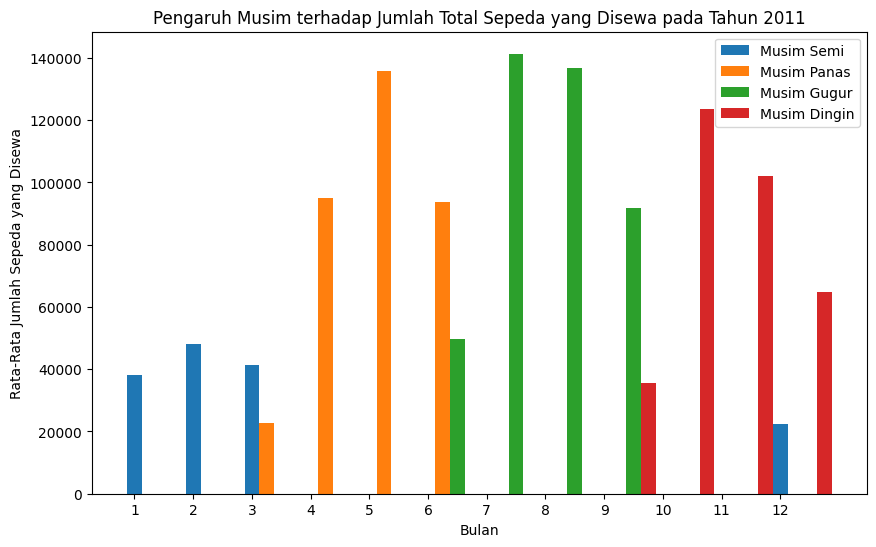

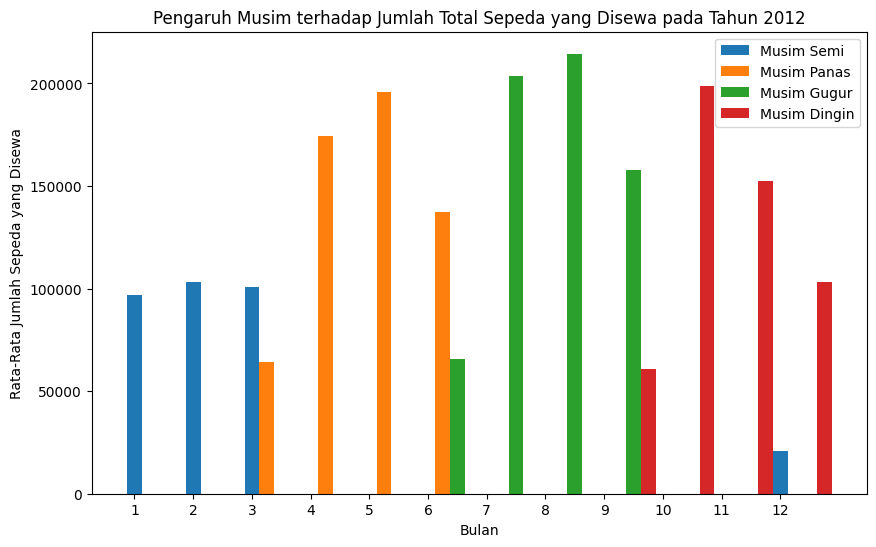

In [22]:
# Pengaruh Musim
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['month'] = day_df['dteday'].dt.month
day_df['year'] = day_df['dteday'].dt.year

years = day_df['year'].unique()

for year in years:
    plt.figure(figsize=(10,6))
    for season in day_df['season'].unique():
        monthly_counts = day_df[(day_df['year'] == year) & (day_df['season'] == season)].groupby('month')['cnt'].sum()
        plt.bar(monthly_counts.index + (season-1)/4, monthly_counts, width=0.25)

    plt.title(f'Pengaruh Musim terhadap Jumlah Total Sepeda yang Disewa pada Tahun {year}')
    plt.xlabel('Bulan')
    plt.ylabel('Rata-Rata Jumlah Sepeda yang Disewa')
    plt.xticks(range(1, 13))
    plt.legend(['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
    plt.show()


In [23]:
# Mencari Nilai Temperature, Windspeed, dan Humidity di Bulan dengan Sewa Sepeda Terendah dan Tertinggi untuk Setiap Tahun
for year in day_df['year'].unique():
    yearly_data = day_df[day_df['year'] == year]
    monthly_counts = yearly_data.groupby('month')['cnt'].sum()

    max_month = monthly_counts.idxmax()
    min_month = monthly_counts.idxmin()

    max_month_data = yearly_data[yearly_data['month'] == max_month]
    min_month_data = yearly_data[yearly_data['month'] == min_month]

    print(f"Pada tahun {year}:")
    print(f"Bulan dengan jumlah total sepeda yang disewa tertinggi adalah bulan {max_month} dengan rata-rata suhu {max_month_data['temp'].mean():.1f}, kecepatan angin {max_month_data['windspeed'].mean():.1f}, dan kelembaban {max_month_data['hum'].mean():.1f}.")
    print(f"Pada bulan ini, persentase sepeda yang disewa oleh pengguna casual adalah {100 * max_month_data['casual'].sum() / max_month_data['cnt'].sum():.1f}% dan pengguna registered adalah {100 * max_month_data['registered'].sum() / max_month_data['cnt'].sum():.1f}%.")
    print(f"Bulan dengan jumlah total sepeda yang disewa terendah adalah bulan {min_month} dengan rata-rata suhu {min_month_data['temp'].mean():.1f}, kecepatan angin {min_month_data['windspeed'].mean():.1f}, dan kelembaban {min_month_data['hum'].mean():.1f}.")
    print(f"Pada bulan ini, persentase sepeda yang disewa oleh pengguna casual adalah {100 * min_month_data['casual'].sum() / min_month_data['cnt'].sum():.1f}% dan pengguna registered adalah {100 * min_month_data['registered'].sum() / min_month_data['cnt'].sum():.1f}%.\n")


Pada tahun 2011:
Bulan dengan jumlah total sepeda yang disewa tertinggi adalah bulan 6 dengan rata-rata suhu 0.7, kecepatan angin 0.2, dan kelembaban 0.6.
Pada bulan ini, persentase sepeda yang disewa oleh pengguna casual adalah 21.3% dan pengguna registered adalah 78.7%.
Bulan dengan jumlah total sepeda yang disewa terendah adalah bulan 1 dengan rata-rata suhu 0.2, kecepatan angin 0.2, dan kelembaban 0.6.
Pada bulan ini, persentase sepeda yang disewa oleh pengguna casual adalah 8.0% dan pengguna registered adalah 92.0%.

Pada tahun 2012:
Bulan dengan jumlah total sepeda yang disewa tertinggi adalah bulan 9 dengan rata-rata suhu 0.6, kecepatan angin 0.2, dan kelembaban 0.6.
Pada bulan ini, persentase sepeda yang disewa oleh pengguna casual adalah 20.0% dan pengguna registered adalah 80.0%.
Bulan dengan jumlah total sepeda yang disewa terendah adalah bulan 1 dengan rata-rata suhu 0.3, kecepatan angin 0.2, dan kelembaban 0.6.
Pada bulan ini, persentase sepeda yang disewa oleh pengguna ca

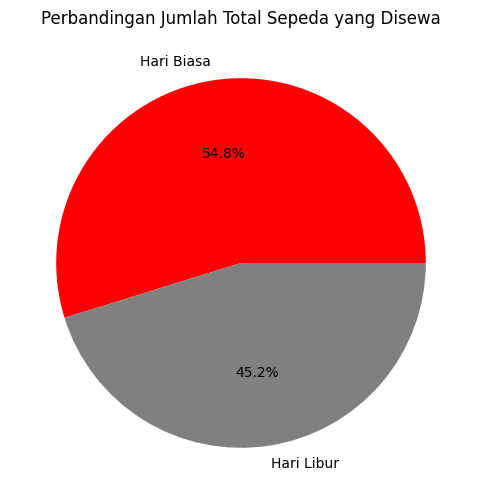

Pada hari libur:
Jumlah total sepeda yang disewa oleh pengguna casual: 22359
Jumlah total sepeda yang disewa oleh pengguna registered: 56076

Pada hari biasa:
Jumlah total sepeda yang disewa oleh pengguna casual: 597658
Jumlah total sepeda yang disewa oleh pengguna registered: 2616586


In [24]:
# Pengaruh Liburan
holiday_counts = day_df.groupby(['holiday'])['cnt'].mean()
colors = ['red' if x == holiday_counts.max() else 'grey' for x in holiday_counts]
plt.figure(figsize=(10,6))
plt.pie(holiday_counts, labels=['Hari Biasa', 'Hari Libur'], colors=colors, autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Total Sepeda yang Disewa')
plt.show()

# Pengguna yang Mendominasi pada Hari Libur
holiday_user_counts = day_df[day_df['holiday'] == 1][['casual', 'registered']].sum()
print("Pada hari libur:")
print(f"Jumlah total sepeda yang disewa oleh pengguna casual: {holiday_user_counts['casual']}")
print(f"Jumlah total sepeda yang disewa oleh pengguna registered: {holiday_user_counts['registered']}")

# Pengguna yang Mendominasi pada Hari Biasa
non_holiday_user_counts = day_df[day_df['holiday'] == 0][['casual', 'registered']].sum()
print("\nPada hari biasa:")
print(f"Jumlah total sepeda yang disewa oleh pengguna casual: {non_holiday_user_counts['casual']}")
print(f"Jumlah total sepeda yang disewa oleh pengguna registered: {non_holiday_user_counts['registered']}")

### explore hour_df

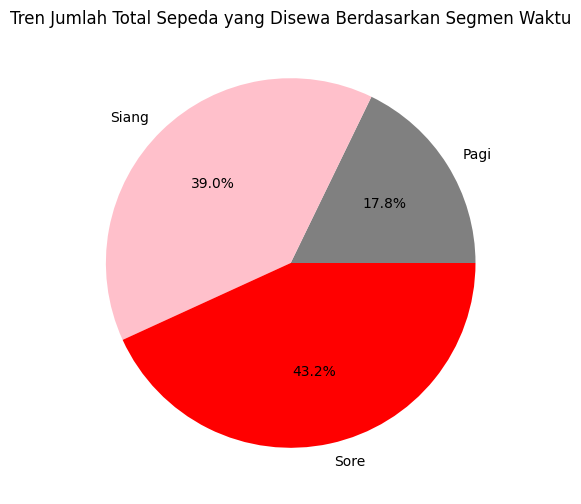


Pada segmen waktu Pagi:
Jumlah total sepeda yang disewa oleh pengguna casual: 102337
Jumlah total sepeda yang disewa oleh pengguna registered: 760171

Pada segmen waktu Siang:
Jumlah total sepeda yang disewa oleh pengguna casual: 200806
Jumlah total sepeda yang disewa oleh pengguna registered: 495499

Pada segmen waktu Sore:
Jumlah total sepeda yang disewa oleh pengguna casual: 316874
Jumlah total sepeda yang disewa oleh pengguna registered: 1416992


In [25]:
# Tren Jam
plt.figure(figsize=(10,6))

# Membuat segmen waktu
def assign_segment(x):
    if 0 <= x < 11:
        return 'Pagi'
    elif 11 <= x < 15:
        return 'Siang'
    else:
        return 'Sore'

hour_df['time_segment'] = hour_df['hr'].apply(assign_segment)

# Menghitung jumlah rata-rata sepeda yang disewa berdasarkan segmen waktu
segment_counts = hour_df.groupby('time_segment')['cnt'].mean()
segment_counts = segment_counts.reindex(['Pagi', 'Siang', 'Sore'])  # Menyusun ulang urutan segmen

# Menentukan warna
colors = ['red' if x == segment_counts.max() else 'grey' if x == segment_counts.min() else 'pink' for x in segment_counts]

plt.pie(segment_counts, labels=segment_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Tren Jumlah Total Sepeda yang Disewa Berdasarkan Segmen Waktu')
plt.show()

# Menghitung jumlah masing-masing pengguna 'casual' dan 'registered' di setiap segmen waktu
segment_user_counts = hour_df.groupby('time_segment')[['casual', 'registered']].sum()

for segment in ['Pagi', 'Siang', 'Sore']:
    print(f"\nPada segmen waktu {segment}:")
    print(f"Jumlah total sepeda yang disewa oleh pengguna casual: {segment_user_counts.loc[segment, 'casual']}")
    print(f"Jumlah total sepeda yang disewa oleh pengguna registered: {segment_user_counts.loc[segment, 'registered']}")


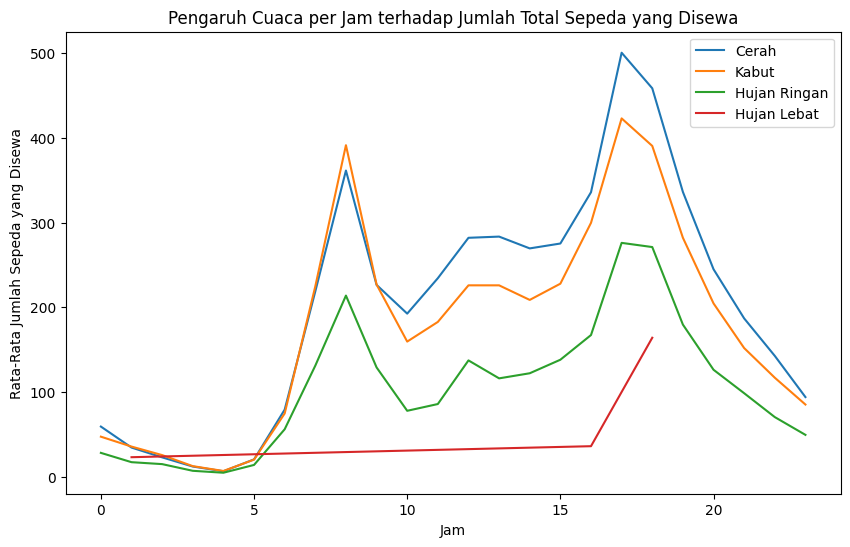

In [26]:
# Pengaruh Cuaca per Jam
plt.figure(figsize=(10,6))
for i in range(1, 5):
    hour_df[hour_df['weathersit'] == i].groupby('hr')['cnt'].mean().plot()
plt.title('Pengaruh Cuaca per Jam terhadap Jumlah Total Sepeda yang Disewa')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Jumlah Sepeda yang Disewa')
plt.legend(['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

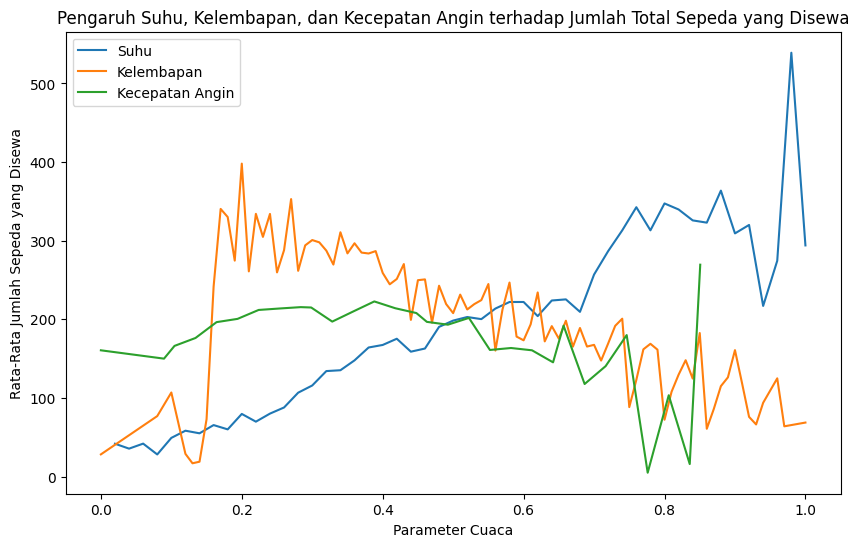

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

# Suhu
hour_df.groupby('temp')['cnt'].mean().plot(ax=ax, label='Suhu')

# Kelembapan
hour_df.groupby('hum')['cnt'].mean().plot(ax=ax, label='Kelembapan')

# Kecepatan Angin
hour_df.groupby('windspeed')['cnt'].mean().plot(ax=ax, label='Kecepatan Angin')

ax.set_title('Pengaruh Suhu, Kelembapan, dan Kecepatan Angin terhadap Jumlah Total Sepeda yang Disewa')
ax.set_xlabel('Parameter Cuaca')
ax.set_ylabel('Rata-Rata Jumlah Sepeda yang Disewa')
ax.legend()
plt.show()


### Pertanyaan 2:

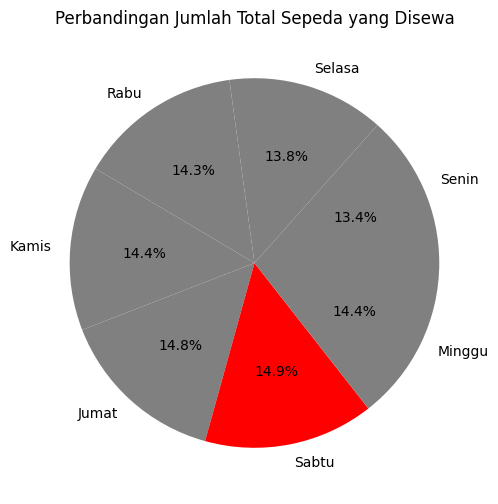

In [28]:
weekday_counts = day_df.groupby(['weekday'])['cnt'].mean()
colors = ['red' if x == weekday_counts.max() else 'grey' for x in weekday_counts]
plt.figure(figsize=(10,6))
plt.pie(weekday_counts, labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], colors=colors, autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Total Sepeda yang Disewa')
plt.show()

### Pertanyaan 3:

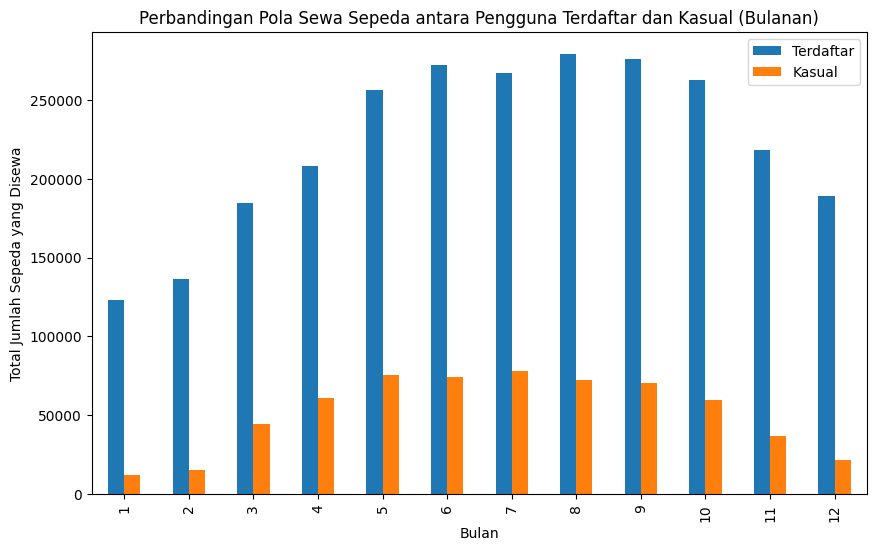

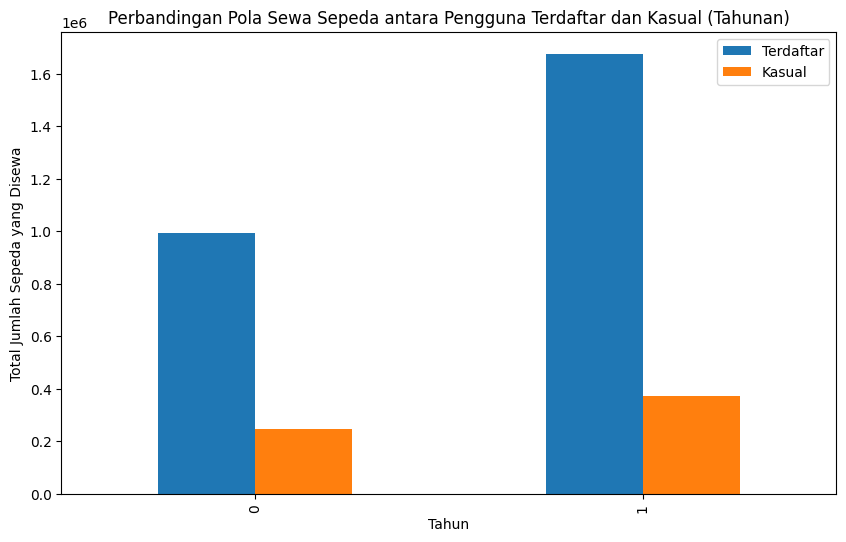

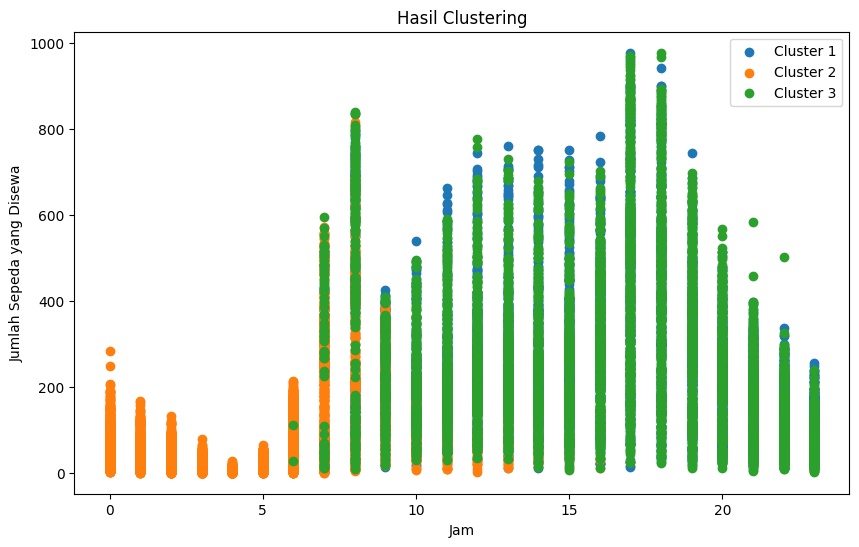

In [29]:
# Jawaban Pertanyaan 3: Perbandingan Pola Sewa Sepeda antara Pengguna Terdaftar dan Kasual

# Bulanan
month_registered_counts = hour_df.groupby(['mnth'])['registered'].sum()
month_casual_counts = hour_df.groupby(['mnth'])['casual'].sum()

df_month = pd.DataFrame({'Terdaftar': month_registered_counts, 'Kasual': month_casual_counts})
df_month.plot(kind='bar', figsize=(10,6))
plt.title('Perbandingan Pola Sewa Sepeda antara Pengguna Terdaftar dan Kasual (Bulanan)')
plt.xlabel('Bulan')
plt.ylabel('Total Jumlah Sepeda yang Disewa')
plt.legend()
plt.show()

# Tahunan
year_registered_counts = hour_df.groupby(['yr'])['registered'].sum()
year_casual_counts = hour_df.groupby(['yr'])['casual'].sum()

df_year = pd.DataFrame({'Terdaftar': year_registered_counts, 'Kasual': year_casual_counts})
df_year.plot(kind='bar', figsize=(10,6))
plt.title('Perbandingan Pola Sewa Sepeda antara Pengguna Terdaftar dan Kasual (Tahunan)')
plt.xlabel('Tahun')
plt.ylabel('Total Jumlah Sepeda yang Disewa')
plt.legend()
plt.show()

# Normalisasi data
df_cluster = hour_df[['hr', 'weekday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered']]
df_norm = (df_cluster - df_cluster.min()) / (df_cluster.max() - df_cluster.min())

# Menentukan jumlah cluster
k = 3

# Melakukan clustering
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(df_norm)

# Menambahkan label cluster ke dataframe
hour_df['cluster'] = clusters

# Menyimpan DataFrame yang telah dimodifikasi kembali ke file CSV
hour_df.to_csv('hour.csv', index=False)

# Visualisasi hasil clustering
plt.figure(figsize=(10,6))
for i in range(k):
    df_cluster = hour_df[hour_df['cluster'] == i]
    plt.scatter(df_cluster['hr'], df_cluster['cnt'], label=f'Cluster {i+1}')
plt.title('Hasil Clustering')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda yang Disewa')
plt.legend()
plt.show()


## Conclusion

- **Pengaruh cuaca, suhu, kelembapan, dan kecepatan angin terhadap jumlah total sepeda yang disewa:** Dari plot yang dihasilkan, tampak bahwa suhu memiliki hubungan positif dengan jumlah sepeda yang disewa, di mana semakin tinggi suhu, jumlah penyewaan sepeda cenderung meningkat. Sementara itu, kelembapan menunjukkan pola yang lebih fluktuatif, tetapi pada tingkat kelembapan yang lebih tinggi, jumlah sepeda yang disewa cenderung menurun. Di sisi lain, kecepatan angin tampak memiliki pengaruh yang lebih bervariasi, dengan beberapa lonjakan dan penurunan tajam. Ini menunjukkan bahwa saat kecepatan angin terlalu tinggi, pengguna cenderung lebih sedikit menyewa sepeda. Dengan demikian, kondisi cuaca yang optimal untuk penyewaan sepeda adalah ketika suhu sedang meningkat, kelembapan tidak terlalu tinggi, dan kecepatan angin relatif stabil.

- **Perbedaan jumlah sepeda yang disewa antara hari kerja, akhir pekan, dan hari libur:** Berdasarkan pie chart, tampak bahwa jumlah sepeda yang disewa pada hari Sabtu merupakan yang tertinggi dibandingkan dengan hari lainnya. Ini menunjukkan bahwa terdapat peningkatan penggunaan sepeda pada akhir pekan, kemungkinan besar untuk keperluan rekreasi atau aktivitas santai.Sementara itu, penyewaan sepeda pada hari kerja terlihat relatif merata, tanpa perbedaan signifikan antarhari. Hal ini mengindikasikan bahwa meskipun sepeda digunakan untuk mobilitas sehari-hari seperti pergi ke tempat kerja atau sekolah, jumlahnya tidak terlalu jauh berbeda dibandingkan dengan akhir pekan. Dengan demikian, meskipun hari kerja tetap memiliki tingkat penyewaan yang stabil, ada kecenderungan peningkatan penggunaan sepeda pada akhir pekan.

- **Perbandingan perilaku sewa sepeda antara pengguna terdaftar dan kasual berdasarkan jam, bulan dan tahun:** Dari bar chart dan scatter plot yang dihasilkan, tampak bahwa pola sewa sepeda antara pengguna terdaftar dan kasual berbeda berdasarkan bulan, tahun, dan jam. Pengguna terdaftar cenderung menyewa sepeda secara konsisten sepanjang tahun, sedangkan pengguna kasual cenderung menyewa sepeda lebih banyak pada bulan-bulan dan jam-jam tertentu. Hasil clustering juga menunjukkan bahwa ada beberapa kelompok pengguna dengan perilaku sewa sepeda yang berbeda.